Note: In principle, for the tasks you would not have to run to already visualize the animations. Otherwise, you may have to wait both for the generation of data and then the loading of the animation.

For the "Try yourself" section I have added progress bars so you can know the wait.

# The numerical solution of the internal energy equation: the heat conduction problem.

$$\frac{\partial T}{\partial t} = \textbf{div}\left(K_{cond}\nabla T\right)$$



## First case: One dimesion with $K_{cond}$ constant.

Equation: 
$$\frac{\partial T}{\partial t} = K_{cond} \frac{\partial^2 T}{\partial x^2}$$

Initial condition:
$$T(x,t=t_0) = T_0(x)$$

Boundary conditions for T.

$$\left\{T(x_0, t), T(x_f, t)\right\}$$

 <font size="5"> Numerical solution. </font> 

Notation: $T(x, t) \simeq T_t(x); x = 0, ..., f (= N_{int})$

Firsly, the initial condition allows to have a complete array with all the temperature in any point.

$$T(x, t=t_0) = T_0(x)$$

To calculate the next step, internal points are calculated as:

$$T_{n+1}(x_i) = T_n(x_i) + \Delta t K_{cond} \frac{T_n(x_{i+1}) + T_n(x_{i-1}) + T_n(x_i)}{\left(\Delta x\right)^2}, x_i \in (x_0, x_f)$$

And with the boundary conditions it is possible calculate the other two points:
$$T_{n+1}(x_0), T_{n+1}(x_f)$$

Now we know all the array $T_{n+1}(x)$ and the next one could be calculated too.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

#### Task 1:





Initial conditions:

$$T_0(x) = 1$$

Internal points:
$$ [x_0, x_1] = [0,1], N_{int} = 256$$
$$ \Delta x = (x_f-x_0)/N_{int}$$
$$ \Delta t = (\Delta x)^2/(2 K_{cond})$$
$$ K_{cond} = 1$$

therefore: $ T_{n+1}(x_i) = T_n(x_i) + \frac{1}{2}\left(T_n(x_{i+1}) + T_n(x_{i-1}) + T_n(x_i)\right)$

Boundary conditions: 
$$T_{n+1}(x_0) = T_{n+1}(x_1)$$
$$T_{n+1}(x_f) = T_{n+1}(x_{N_{int}-1})$$


In [2]:
# Second Version
# Space:
x = np.linspace(0, 1, 256)
N_x = len(x)

# initial conditions:
T_H = np.array([list(np.ones_like(x))])

def T_next_Task_1(T_n, x):
  # internal points:
  _ = list(map(lambda x: T_n[x] + 1/2*(T_n[x+1] + T_n[x-1] - 2*T_n[x]), range(1, N_x-1)))
  # Boundary conditions
  return np.array([_[0]] + _ + [_[-1]])

# Timeline
n = 0
while n < 8000:
  T_H = np.append(T_H, [T_next_Task_1(T_H[-1], x)], axis = 0)
  n += 1

print(np.shape(T_H))

(8001, 256)


In [3]:
# Animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue") # Real
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(-2, 2)
  ax.set_xlabel('Eje x')
  ax.set_ylabel('T(x)')
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  return line_1,

def update(frame):
  line_1.set_data(x, T_H[frame*80])
  return line_1,

ani = FuncAnimation(fig, update, frames=range(0, 100),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

#### Task 2:





Initial conditions:

$$T_0(x) = 1 + A_0e^\left[-\frac{(x-x_c)^2}{W^2}\right]$$
$$x_c = 0.5$$
$$W = 0.1$$
$$A_0 = 1/2$$

Internal points:
$$ [x_0, x_1] = [0,1], N_{int} = 512$$
$$ \Delta x = (x_f-x_0)/N_{int}$$
$$ \Delta t = (\Delta x)^2/(2 K_{cond})$$
$$ K_{cond} = 1$$

therefore: $ T_{n+1}(x_i) = T_n(x_i) + \frac{1}{2}\left(T_n(x_{i+1}) + T_n(x_{i-1}) + T_n(x_i)\right)$

Boundary conditions: 
$$T_{n+1}(x_0) = T_{n+1}(x_1)$$
$$T_{n+1}(x_f) = T_{n+1}(x_{N_{int}-1})$$


In [4]:
# Space:
x = np.linspace(0, 1, 512)
N_x = len(x)

# initial conditions:
T_0_x = lambda x: 1 + 0.5*np.exp(-(x-0.5)**2/(0.1)**2)
T_H = np.array([list(T_0_x(x))])

def T_next_Task_1(T_n, x):
  # internal points:
  _ = list(map(lambda x: T_n[x] + 1/2*(T_n[x+1] + T_n[x-1] - 2*T_n[x]), range(1, N_x-1)))
  # Boundary conditions
  return np.array([_[0]] + _ + [_[-1]])

# Timeline
n = 0
while n < 20000:
  T_H = np.append(T_H, [T_next_Task_1(T_H[-1], x)], axis = 0)
  n += 1

print(np.shape(T_H))

(20001, 512)


In [5]:
# Animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue") # Real
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(T_H[0].min(), T_H[0].max())
  ax.set_xlabel('Eje x')
  ax.set_ylabel('T(x)')
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  return line_1,

def update(frame):
  line_1.set_data(x, T_H[frame*200])
  return line_1,

ani = FuncAnimation(fig, update, frames=range(0, 100),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

Output hidden; open in https://colab.research.google.com to view.

Now the analytical result will be calculated and compared with the numerical solutions for different grids (128, 256, 512, 1024, 2048, 4096, 8192).

##### Analytical solution.

The analytical solution is obtained from the following website:

http://web.csulb.edu/~kmerry/FourierAnalysis/Fourier_09.pdf

equation 9.11.

$$ u(x,t) = \frac{1}{\sqrt{4\pi t}}\int_{-\infty}^\infty f(y) \exp{\left(- \frac{(x-y)^2}{4t} \right)}dy $$

In this case:

$$ T(x,t) = \frac{1}{\sqrt{4\pi t}}\int_{-\infty}^\infty \left(1 + 0.5 \exp{\left[-\frac{(y-0.5)^2}{0.1^2} \right]}\right) \exp{\left(- \frac{(x-y)^2}{4t} \right)}dy= \dfrac{\mathrm{e}^{\frac{x^2}{1600t^2+4t}-\frac{x^2}{4t}+\frac{100x}{400t+1}+\frac{10000t}{400t+1}-25}}{2\sqrt{400t+1}}+1 = $$ 

$$ = \dfrac{\exp{\left(\frac{-100(x-0.5)^2}{400t+1}\right)}}{2\sqrt{400t+1}}+1$$


You can see that if you take the initial moment it meets the condition.



In [6]:
T_x_t = lambda x, t: 1 + np.exp(-100*(x-0.5)**2/(400*t+1))/(2*np.sqrt(400*t+1))
T_0_x = lambda x: 1 + 0.5*np.exp(-(x-0.5)**2/(0.1)**2)

print("Deviation in t=0, x=1: ", T_x_t(1,0)-T_0_x(1))

Deviation in t=0, x=1:  0.0


In [7]:
# Animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

x = np.linspace(0, 1, 512)

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue") # Real
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(0.8, 1.5)
  ax.set_xlabel('Eje x')
  ax.set_ylabel('T(x)')
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  return line_1,

def update(frame):
  line_1.set_data(x, T_x_t(x, frame/1000))
  return line_1,

ani = FuncAnimation(fig, update, frames=range(0, 100),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

##### Numerical solutions.

Calculation of all numerical approximations for a time interval of $t = 128 $.

Remember, in this case:

$$\Delta t = \frac{1}{2 (N_{int})^2}$$

In [8]:
def num_sol_task_2(N_x, t=128):
  # Space:
  x = np.linspace(0, 1, N_x)

  # initial conditions:
  T_0_x = lambda x: 1 + 0.5*np.exp(-(x-0.5)**2/(0.1)**2)

  def T_next_Task_1(T_n, x):
    # internal points:
    _ = list(map(lambda x: T_n[x] + 1/2*(T_n[x+1] + T_n[x-1] - 2*T_n[x]), range(1, N_x-1)))
    # Boundary conditions
    return np.array([_[0]] + _ + [_[-1]])

  # Timeline
  n = 0
  T_x = T_0_x(x)
  while n < (128/(2*N_x)**2):
    T_x = T_next_Task_1(T_x, x)
    n += 1

  return T_x

x_grids = 2**np.arange(8,14)
num_sols_list_task_2 = np.array([num_sol_task_2(i) for i in x_grids])
ana_sols_list_task_2 = np.array([T_x_t(np.linspace(0, 1, i), 0.000128) for i in x_grids])

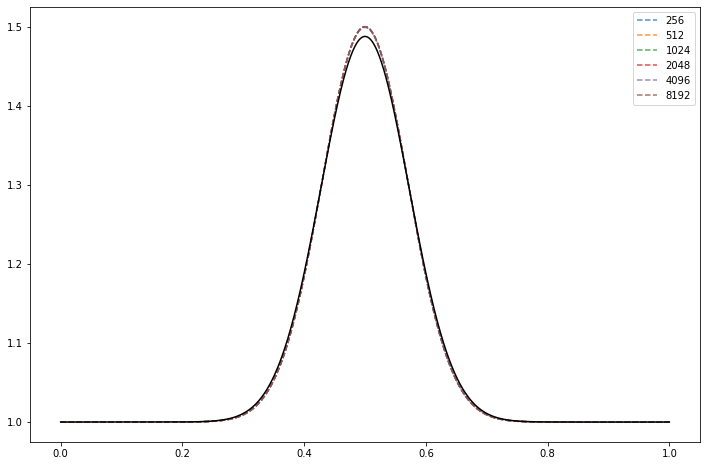

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

for i in np.arange(len(x_grids)):
  ax.plot(np.linspace(0, 1, x_grids[i]), num_sols_list_task_2[i], 
          label=x_grids[i], alpha = 0.8, linestyle='--')

ax.plot(np.linspace(0, 1, x_grids[-1]), ana_sols_list_task_2[-1], color='k')

ax.legend()
plt.show()

#### Task 3:





Initial conditions:

$$T_0(x) = 1 + A_0\left\{e^\left[-\frac{(x-x_1)^2}{W_1^2}\right] + e^\left[-\frac{(x-x_2)^2}{W_2^2}\right]\right\}$$
$$x_1 = 0.44, x_2 = 0.56$$
$$W_1 = W_2 = 0.05$$
$$A_0 = 1/2$$

Internal points:
$$ [x_0, x_1] = [0,1], N_{int} = 512$$
$$ \Delta x = (x_f-x_0)/N_{int}$$
$$ \Delta t = (\Delta x)^2/(2 K_{cond})$$
$$ K_{cond} = 1$$

therefore: $ T_{n+1}(x_i) = T_n(x_i) + \frac{1}{2}\left(T_n(x_{i+1}) + T_n(x_{i-1}) + T_n(x_i)\right)$

Boundary conditions: 
$$T_{n+1}(x_0) = T_{n+1}(x_1)$$
$$T_{n+1}(x_f) = T_{n+1}(x_{N_{int}-1})$$


In [10]:
# Space:
x = np.linspace(0, 1, 512)
N_x = len(x)

# initial conditions:
T_0_x = lambda x: 1 + 0.5*(np.exp(-(x-0.44)**2/(0.05)**2) + np.exp(-(x-0.56)**2/(0.05)**2) )
T_H = np.array([list(T_0_x(x))])

def T_next_Task_1(T_n, x):
  # internal points:
  _ = list(map(lambda x: T_n[x] + 1/2*(T_n[x+1] + T_n[x-1] - 2*T_n[x]), range(1, N_x-1)))
  # Boundary conditions
  return np.array([_[0]] + _ + [_[-1]])

# Timeline
n = 0
while n < 20000:
  T_H = np.append(T_H, [T_next_Task_1(T_H[-1], x)], axis = 0)
  n += 1

print(np.shape(T_H))

(20001, 512)


In [11]:
# Animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue") # Real
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(-2, 2)
  ax.set_xlabel('Eje x')
  ax.set_ylabel('T(x)')
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  return line_1,

def update(frame):
  line_1.set_data(x, T_H[frame*200])
  return line_1,

ani = FuncAnimation(fig, update, frames=range(0, 100),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

## First case, summary:

This first part has been quite simple. 

Task 1 was solved quickly and with his code I could do both task 2 and task 3.

Task 2 was solved easily but I have had difficulties both to obtain the analytical result and to try to compare it with the numerical results. In the end I did obtain the analytical result, it was verified that when it was in the initial moment it reproduced the conditions at time zero, but when trying to compare it with the numerical results there were problems with the steps in time. I had not realized with the equation of the $\Delta t$

Task 3 was easily solved and the result obtained was the expected one. It reminds me of a sum of waves.

## Try yourself, first case:





Notation: $T(x, t) \simeq T_t(x); x = 0, ..., f (= N_{int})$

Firsly, the initial condition allows to have a complete array with all the temperature in any point.

$$T(x, t=t_0) = T_0(x)$$

To calculate the next step, internal points are calculated as:

$$T_{n+1}(x_i) = T_n(x_i) + \Delta t K_{cond} \frac{T_n(x_{i+1}) + T_n(x_{i-1}) + T_n(x_i)}{\left(\Delta x\right)^2}, x_i \in (x_0, x_f)$$

If $\Delta t$, $K_{cond}$ and $\Delta x$ are constants: $\frac{\Delta t K_{cond}}{\left(\Delta x\right)^2} \equiv Termino = CTE $

And with the boundary conditions it is possible calculate the other two points:
$$T_{n+1}(x_0) = T_{n+1}(x_1)$$
$$T_{n+1}(x_f) = T_{n+1}(x_{f-1})$$

Note: If you want change the boundary conditions, you have to change the code directly, clik twice the section "Internal points function".

Now we know all the array $T_{n+1}(x)$ and the next one could be calculated too.

In [12]:
# Librarys
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy.parsing.sympy_parser import parse_expr

sp.init_printing()

In [13]:
#@title Progress bar
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [14]:
#@title Space
#@markdown Details of the one-dimensional grid.

x_0 = 0#@param {type:"number"}
x_f = 6#@param {type:"number"}
N_int =  1024#@param {type:"integer"}

x = np.linspace(x_0, x_f, N_int)

In [15]:
#@title initial conditions T_0(x):

x_symbol = sp.symbols('x')
T_0_x = "sin(2*x) + exp(-x**2)" #@param {type:"string"}
T_0_x_lambda = sp.lambdify(x_symbol, parse_expr(T_0_x), 'numpy')

T_H = np.array([list(T_0_x_lambda(x))])

sp.Eq(sp.Function('T_0')(x_symbol), parse_expr(T_0_x, evaluate=False))



In [16]:
#@title Internal points function
def T_next(T_n, x):
  """
  
   Extreme points are added from the established border conditions. 
   If you want to change the conditions you only have to change the terms that 
   are introduced. 
   DANGER: the entry, even if it is two separate points must be within a list 
   for the concatenation to be correct.

   For example, if you want to take two temperature sources as a border (T_a, T_b):

      T_a = 1; T_b = 2
      return np.array([T_a]) + _ + [T_b])

   """
  termino =  0.5#@param {type:"number"}
  T_n_1_x = lambda x: T_n[x] + termino*(T_n[x+1] + T_n[x-1] - 2*T_n[x])
  _ = list(map(T_n_1_x, range(1, N_int-1)))
   # Boundary conditions
  return np.array([_[0]] + _ + [_[-1]])

In [17]:
#@title Timeline

n_0 = 0
n_f = 2000 #@param {type:"integer"}

out_timeline = display(progress(0, 100), display_id=True)
while n_0 <= n_f:
  T_H = np.append(T_H, [T_next(T_H[-1], x)], axis = 0)
  n_0 += 1; out_timeline.update(progress(n_0/n_f*100, 100))

In [18]:
#@title Animation
import matplotlib
from matplotlib import rc
from matplotlib.animation import FuncAnimation
matplotlib.rcParams['animation.embed_limit'] = 2**128

frames = 100 #@param {type:"integer"}

out_animation = display(progress(0, 100), display_id=True)

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue") # Real
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(T_H[0].min(), T_H[0].max())
  ax.set_xlabel('Eje x')
  ax.set_ylabel('T(x)')
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  return line_1,

def update(frame): 
  line_1.set_data(x, T_H[frame*int(len(T_H)/frames)])
  out_animation.update(progress(frame+1, frames))
  return line_1,

ani = FuncAnimation(fig, update, frames=range(0, frames),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

Output hidden; open in https://colab.research.google.com to view.

## Try yourshelf, summary:

The "Try yourself" is a beautiful game center, it allows to modify many parameters as well as the expression of the initial condition, of which I feel very proud. A pity I could not add to modify the boundary conditions. Besides I would have liked also to do it for the next case, but it did not give me more time.

## Second: One dimesion with $K_{cond}(x).$

Equation: 
$$\frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\left(K_{cond}(x)\frac{\partial T}{\partial x}\right)$$

Initial condition:
$$T(x,t=t_0) = T_0(x)$$

Boundary conditions for T.

$$\left\{T(x_0, t), T(x_f, t)\right\}$$

 <font size="5"> Numerical solution. </font> 

Notation: $T(x, t) \simeq T_t(x); x = 0, ..., f (= N_{int})$

Firsly, the initial condition allows to have a complete array with all the temperature in any point.

$$T(x, t=t_0) = T_0(x)$$

To calculate the next step, internal points are calculated as:

$$T_{n+1}(x_i) = T_n(x_i) + \Delta t \frac{K(x_{i+1})(T_n(x_{i+1}) - T_n(x_i)) - K(x_{i-1})(T_n(x_i) - T_n(x_{i-1})) + K(x_i)(T_n(x_{i+1}) + T_n(x-1) - 2T_n(x))}{2\left(\Delta x\right)^2}, x_i \in (x_0, x_f)$$

And with the boundary conditions it is possible calculate the other two points:
$$T_{n+1}(x_0), T_{n+1}(x_f)$$

Now we know all the array $T_{n+1}(x)$ and the next one could be calculated too.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#### Task 4.



Initial conditions
Initial temperature, a linear function linking the boundary values.:

$$T_0(x) = T_a + \frac{x - x_0}{x_f - x_0}(T_b - T_a)$$

And

$$K_{cond} = K_0 + A_1\left[1+tanh\left(\frac{x_1-x}{W_1}\right)\right] + A_2 \left[1+tanh\left(\frac{x-x_2}{W_2}\right)\right]$$
$$A_1 = 1.0, A_2 = 2.0$$
$$K_0 = 0.05$$
$$x_1 = -2.0, x_2 = 2.0$$
$$W_1 = W_2 = 0.3$$

So: $K_{cond} = 0.05 + \left[1+tanh\left(\frac{-2-x}{0.3}\right)\right] + 2 \left[1+tanh\left(\frac{x-2}{0.3}\right)\right]$

Internal points:
$$ [x_0, x_1] = [-8,8], N_{int} = 256$$
$$ \Delta x = (x_f-x_0)/N_{int}$$
$$ \Delta t = (\Delta x)^2/(2 max(K_{cond}))$$

Therefore: $\frac{\Delta t}{2\left(\Delta x\right)^2} = \frac{1}{4max(K_{cond})} \leftrightarrow$

$$\leftrightarrow T_{n+1}(x_i) = T_n(x_i) + \frac{1}{4max(K_{cond})} \left[K(x_{i+1})(T_n(x_{i+1}) - T_n(x_i)) - K(x_{i-1})(T_n(x_i) - T_n(x_{i-1})) + K(x_i)(T_n(x_{i+1}) + T_n(x-1) - 2T_n(x))\right], x_i \in (x_0, x_f)$$

Boundary conditions: 
$$T_{n+1}(x_0) = T_a$$
$$T_{n+1}(x_f) = T_b$$
$$T_a = 2.0, T_b = 1.0$$

Therefor: $T_0(x) = 2 - \frac{x+8}{16}$

In [20]:
# Space:
x = np.linspace(-8, 8, 256)
N_x = len(x)

# initial conditions:
T_0_x = lambda x: 2 - (x+8)/16
T_H = np.array([list(T_0_x(x))])

K = list(map(lambda x: 0.05 + (1 + np.tanh(-(2+x)/0.3) + 2*(1+np.tanh((x-2)/0.3))), x))

def T_next_Task_1(T_n, K, x):
  # internal points:
  _ = list(map(lambda x: T_n[x] + 1/(4*max(K))*(K[x+1]*(T_n[x+1] - T_n[x]) + \
                                               K[x-1]*(T_n[x] - T_n[x-1]) + \
                                               K[x]*(T_n[x+1] + T_n[x-1] - 2*T_n[x])), range(1, N_x-1)))
  # Boundary conditions
  T_a = 2; T_b = 1
  return np.array([T_a] + _ + [T_b])

# Timeline
n = 0
while n < 15000:
  T_H = np.append(T_H, [T_next_Task_1(T_H[-1], K, x)], axis = 0)
  n += 1

print(np.shape(T_H))

(15001, 256)


In [21]:
# Animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue") # Real
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(min(T_H[0]), max(T_H[0]))
  ax.set_xlabel('Eje x')
  ax.set_ylabel('T(x)')
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  return line_1,

def update(frame):
  line_1.set_data(x, T_H[frame*15])
  return line_1,

ani = FuncAnimation(fig, update, frames=range(0, 1000),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

Output hidden; open in https://colab.research.google.com to view.

For different values of $K_0 = [5*10^{-3}, 10^{-3}, 0.1]$ we will study the shape of the heat flux through:

$$\left(-K_{cond}\frac{\partial T}{\partial x}\right)_{x=x_i} \simeq -K(x_i)\frac{T_n(x_i+1) - T_n(i-1)}{2\Delta x}, i = 1, \cdots, N_{int}-1$$

In [22]:
def num_sols_task_4(K_0):
  # Space:
  x = np.linspace(-8, 8, 256)
  N_x = len(x)
  Delta_x = (x[-1]-x[0])/256

  # initial conditions:
  T_0_x = lambda x: 2 - (x+8)/16
  K = list(map(lambda x: K_0 + (1 + np.tanh(-(2+x)/0.3) + 2*(1+np.tanh((x-2)/0.3))), x))

  def T_next_Task_1(T_n, K, x):
    # internal points:
    _ = list(map(lambda x: T_n[x] + 1/(4*max(K))*(K[x+1]*(T_n[x+1] - T_n[x]) + \
                                                K[x-1]*(T_n[x] - T_n[x-1]) + \
                                                K[x]*(T_n[x+1] + T_n[x-1] - 2*T_n[x])), range(1, N_x-1)))
    # Boundary conditions
    T_a = 2; T_b = 1
    return np.array([T_a] + _ + [T_b])

  def Heat_flux(T_n, K, x):
    return list(map(lambda x: -K[x]*(T_n[x+1] - T_n[x-1])/(2*Delta_x), range(1, N_x-1)))

  T_H = np.array([list(T_0_x(x))])
  flux_H = np.array([list(Heat_flux(T_H[-1], K, x))])

  # Timeline
  n = 0
  while n < 1500:
    T_H = np.append(T_H, [T_next_Task_1(T_H[-1], K, x)], axis = 0)
    flux_H = np.append(flux_H, [Heat_flux(T_H[-1], K, x)], axis = 0)
    n += 1

  print(np.shape(flux_H))

  return flux_H

sols = np.array([num_sols_task_4(i) for i in [5e-3, 1e-3, 0.1]])

(1501, 254)
(1501, 254)
(1501, 254)


In [23]:
# Animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(12,8))
line_1, = ax.plot([], [], lw=2, color = "blue", label=r'$K_0 = 5\cdot10^{-3}$')
line_2, = ax.plot([], [], lw=2, color = "red", label=r'$K_0 = 1\cdot10^{-3}$') 
line_3, = ax.plot([], [], lw=2, color = "green", label=r'$K_0 = 0.1$') 
plt.close()

def init():
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim(sols.min()-3, sols.max())
  ax.set_xlabel('Flux Heat')
  ax.set_ylabel('T(x)')
  ax.legend()
  ax.axes.grid(animated = True)
  line_1.set_data([], [])
  line_1.set_data([], [])
  line_1.set_data([], [])
  return line_1, line_2, line_3,

def update(frame):
  line_1.set_data(x[1:-1], sols[0, frame*15])
  line_2.set_data(x[1:-1], sols[1, frame*15])
  line_3.set_data(x[1:-1], sols[2, frame*15])
  return line_1, line_2, line_3

ani = FuncAnimation(fig, update, frames=range(0, 100),
                    init_func=init, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

## Second case, summary

The second case has been worse, I understand that could be normal because it is more complex, implementing the code, adapting the new expressions were easy; the difficult thing has been the physical interpretation of what was obtained. I believe that it would have been easier to start with a simpler $K_{cond}(x)$ in order to understand what was happening, but it is too late. 

I can vaguely understand how it varies the thermal conductivity when $K_{cond}$ is not constant, but the tanh functions are too complex. Likewise with the examples he left me in the human body statement I can intuit that the result is satisfactory.

Finally, with the flow of heat I could not do anything, what I think I understand about the equation of conductivity is a mystery to me for the flux, and I think it is reflected that I do not even understand how to describe the graphs of heat flux. A total disaster in this respect. Probably, this is because I have tried to see as a "spatial velocity" or something like that...